In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Функция для обработки DataFrame

In [5]:
def prepare_data(data):
    if isinstance(data, pd.DataFrame):
        return data.squeeze()
    elif isinstance(data, pd.Series):
        return data
    else:
        raise ValueError("Неподдерживаемый тип данных")

Считаем данные о котировке двух инструментов

In [6]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']


x_1 = prepare_data(pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0))
y_1 = prepare_data(pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0))

Вывод данных массивов

In [51]:
x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


In [45]:
print(x.shape, y.shape)
print('Размеры массивов одинаковые')

(20,) (20,)
Размеры массивов одинаковые


In [48]:
print(x == x_1)
print(y == y_1)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: 0, dtype: bool
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: 0, dtype: bool


In [49]:
print('Обработка DataFrame прошла успешно')

Обработка DataFrame прошла успешно


Линейная зависимость одной переменной от другой

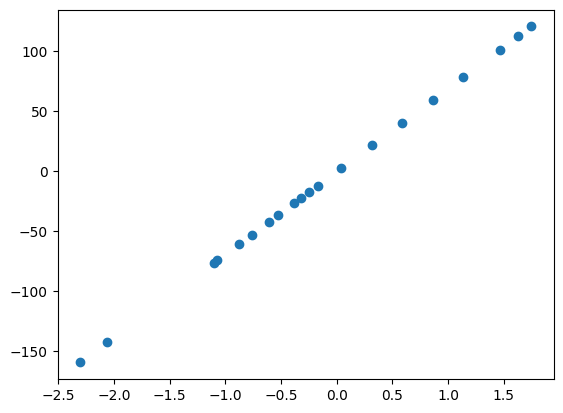

In [50]:
plt.figure()
plt.scatter(x, y)
plt.show()

Модель парной линейной регрессии

In [178]:
class Model(object):
    """
    Модель парной линейной регрессии y = b0 + b1 * x
    """
    def __init__(self, max_iter = 50):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter
    """
    Метод возвращет теоритическое значение выходной переменной
    """
    def predict(self, X):
        return self.b0 + self.b1 * X

    """
    Функция ошибок - среднеквадратическое отклонение J = y_pred - y_true
    """
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))


    """
    Метод градиентного спуска
    Параметр альфа скорость обучения
    """
    def fit(self, X, Y, alpha=0.001, min_error_change=0.000001):
        steps, errors = [0], [self.error(X, Y)]

        for step in range(self.max_iter):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_error = self.error(X, Y)
            old_error = errors[-1]

            if new_error > old_error:
                alpha /= 2
                self.__init__()

            if abs(old_error - new_error) < min_error_change:
                break

            steps.append(step)
            errors.append(new_error)

        else:
            print('Warning')

        return steps, errors


    def score(self, X, Y):
        y_pred = self.predict(X)

        total_variance = sum((Y - np.mean(Y))**2)
        residual_variance = sum((Y - Y_pred)**2)

        return 1 - residual_variance/total_variance

    def plot_results(self, X, Y, steps, errors):
        X0 = np.linspace(min(X), max(X), 100)
        Y0 = self.predict(X0)

        plt.figure()
        plt.scatter(X, Y, label='Данные')
        plt.plot(X0, Y0, 'r', label='Модель')
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('График регрессии')
        plt.show()

        plt.figure()
        plt.plot(steps, errors, 'g')
        plt.xlabel('Шаг')
        plt.ylabel('Ошибка')
        plt.title('График изменения ошибки')
        plt.show()


Градиентный спуск

In [182]:
hyp = Model(max_iter=5000)

J_0 = hyp.error(x, y)
print("error after gradient descent:", J_0)

steps, errors = hyp.fit(x, y)

J_1 = hyp.error(x, y)
print("error after gradient descent:", J_1)

r2_custom = hyp.score(x, y)

error after gradient descent: 2937.6446095153397
Warning
error after gradient descent: 0.03937321303112907


График регрессии

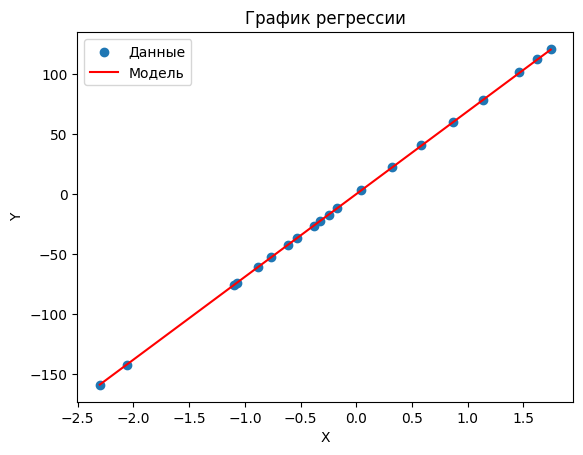

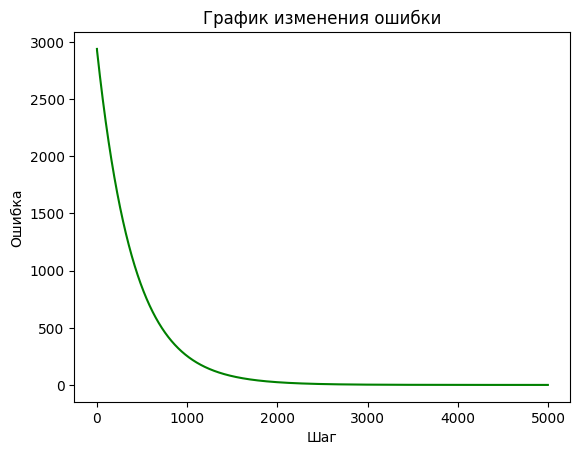

In [185]:
hyp.plot_results(x, y, steps, errors)

Дополнительное задание

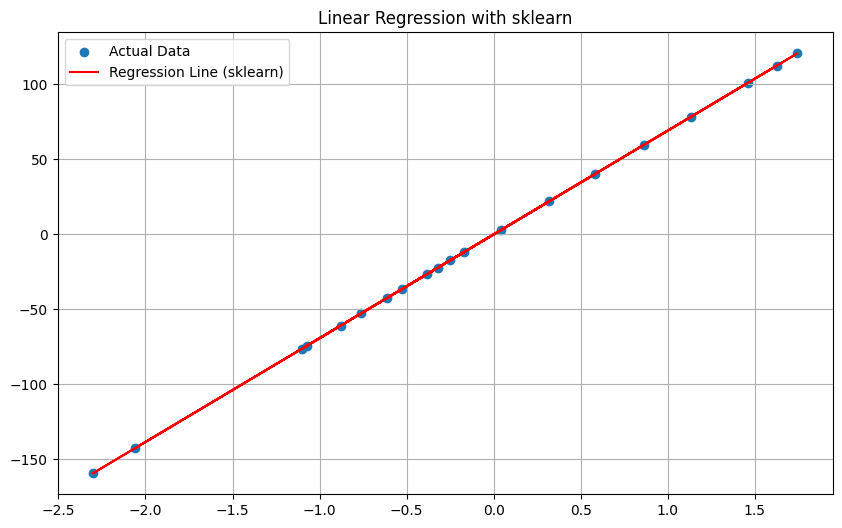

In [188]:
from sklearn.linear_model import LinearRegression

x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

X = x.values.reshape(-1, 1)
Y = y.values

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

r2_sklearn = model.score(X, Y)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label="Actual Data")
plt.plot(X, Y_pred, 'r', label="Regression Line (sklearn)")
plt.legend()
plt.grid(True)
plt.title("Linear Regression with sklearn")
plt.show()

In [194]:
print(f"R² (sklearn): {r2_sklearn}")
print(f"R² (custom): {r2_custom}")

R² (sklearn): 1.0
R² (custom): 1.0
